In [75]:
pip install scikit_optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
pip install -U memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
#%load_ext autotime
#%load_ext memory_profiler

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from skopt.plots import plot_convergence
from skopt import gp_minimize
from tensorflow import keras
import pickle 
import matplotlib.ticker as ticker

In [81]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [82]:
cd /content/gdrive/MyDrive/'Colab Notebooks'/'Thesis Project 2021'/Regular_schedule

/content/gdrive/MyDrive/Colab Notebooks/Thesis Project 2021/Regular_schedule


In [83]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("./my_model",compile=False)

#load scaler
with open("my_scaler_x.pkl","rb") as f:
    loaded_scaler_x= pickle.load(f)

with open("my_scaler_y.pkl","rb") as f:
    loaded_scaler_y= pickle.load(f)

In [84]:
def f( arr ):
    arr = np.array(arr)
    arr=arr[np.newaxis,:]
    X_scaled= loaded_scaler_x.transform(arr)    
    predicted_y= loaded_scaler_y.inverse_transform(reconstructed_model.predict(X_scaled))
    
    return predicted_y[0,0]

In [85]:
def stop_condition(res, n_calls_before_stop = 100):
    stop_condition.counter += 1
    if stop_condition.counter == n_calls_before_stop:
        if res.fun < 11500:
            return True
        else:
            return False
    else:
        return False
stop_condition.counter = 0

In [86]:
# res = gp_minimize(f,                  # the function to minimize
#                   [(10, 25),(25,45),(3.5,5.5),(1,7),(0.2,0.7),(23,26),(2,15),(10,30)],      # the bounds on each dimension of x
#                   acq_func="gp_hedge",      # the acquisition function
#                   n_calls=100,         # the number of evaluations of f
#                   n_random_starts=8,  # the number of random initialization points
#                   noise=0,       # the noise level (optional)
#                   n_points = 1000,
#                   xi=0.1,
#                   kappa = 0.01,
#                   random_state=1234)   # the random seed

In [126]:
res = gp_minimize(f,                  # the function to minimize
                  [(0, 12.08),(0,12.08),(0,12.08),(10,17),(0.2,0.7),(10,14),(10,15),(10,30)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=100,         # the number of evaluations of f
                  n_random_starts=8,  # the number of random initialization points
                  noise=0,       # the noise level (optional)
                  callback = stop_condition,
                  random_state=1234)   # the random seed

1/1 [==============================] - 0s 17ms/step


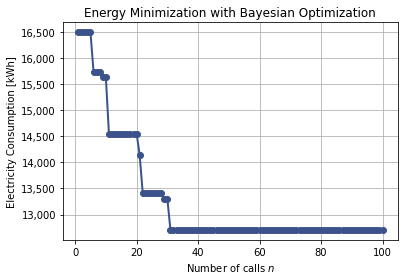

In [127]:
plot_convergence(res)
plt.ylabel('Electricity Consumption [kWh]')
plt.title('Energy Minimization with Bayesian Optimization')

def format_kWh(x, pos):
    if x >= 0:
        return '{:,.0f}'.format(x) if x % 500 == 0 else ''
    else:
        return '{:,.0f}'.format

# Apply custom function to y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_kWh))

# if res.fun <= 11500:
#     plt.ylim(12500, 17000)

# plt.yticks([11000, 11500, 12000, 12500, 13000], ['13,000', '13,500', '14,000', '14,500', '15,000', '15,500', '16,000', '16,500', '17,000'])



In [128]:
res.fun

12703.962

In [129]:
res.x

[0.0, 12.08, 12.08, 17, 0.2, 10, 10, 30]